<a href="https://colab.research.google.com/github/Archesz/Analise-Enem/blob/main/AnaliseEnem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Educação: Análise de dados com base no Enem 2019 - Imersão de Dados.

Desde 1998, o Exame Nacional do Ensino Médio (Enem) é aplicado anualmente, oferecendo novas oportunidades para milhões de pessoas que desejar seguir ou subir em graus acadêmicos, com diversas mudanças ao longo do tempo, o Enem além de um exame para oferecer oportunidade, é uma excelente ferramenta para medir a educação do País.

**Imersão de Dados 2** é um projeto realizado pela [Alura](https://www.alura.com.br/), visando atrair, ensinar e treinar pessoas para o mundo da ciência de dados, fornecendo aulas, lives, informações e uma comunidade extremamente saúdavel e colaborativa.



# Dados

O Conjunto de dados principal foi fornecido pelo próprio evento, estarei utilizando o de **Campinas**, correspondendo ao meu município. 
Os dados retratam exclusivamente o Enem de 2019.
Estarei utilizando também dados gerados pelo [Inep Data](https://inepdata.inep.gov.br/analytics/saw.dll?dashboard) com informações sobre as Escolas de Campinas.

In [ ]:
# Bibliotecas e pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import math

In [ ]:
# Dados de São Paulo
uri = f"https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true"
arquivo = 'sp.csv.zip'
!wget -O $arquivo $uri
dados_sp = pd.read_csv(arquivo, sep=';')

# Dados da região de Campinas
dados = dados_sp.query('NO_MUNICIPIO_RESIDENCIA == "Campinas" and TP_PRESENCA_MT == 1 and TP_PRESENCA_LC == 1')

# Criando variações dos dados
dados_sem_notas_zero = dados.query('NU_NOTA_MT != 0 and NU_NOTA_CN != 0 and NU_NOTA_LC != 0 and NU_NOTA_CH != 0')

# Adicionando Coluna da média final
provas = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)

# Dataset gerado pelo InepData com as escolas de Campinas


--2020-10-25 20:24:08--  https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/por%20estado/sp.csv.zip?raw=true
Resolving github.com (github.com)... 13.114.40.48
Connecting to github.com (github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip [following]
--2020-10-25 20:24:09--  https://github.com/alura-cursos/imersao-dados-2-2020/raw/master/por%20estado/sp.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip [following]
--2020-10-25 20:24:09--  https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/por%20estado/sp.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githu

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Dicionário de Variáveis** 
O dicionário de variáveis é encontrando [Aqui](https://drive.google.com/file/d/1N8fVqNUwzxhWVIBS1XPHVs22kRyYZ4Zj/view?usp=sharing).

In [ ]:
uri2 = f"https://raw.githubusercontent.com/AtSnake/escolasCampinas/main/test1.txt"
arquivo2 = 'test1.txt'
!wget -O $arquivo2 $uri2
dados_escola = pd.read_csv(arquivo2, sep='\t', encoding='latin1', lineterminator='\r')
dados_escola

--2020-10-25 20:24:26--  https://raw.githubusercontent.com/AtSnake/escolasCampinas/main/test1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68177 (67K) [text/plain]
Saving to: ‘test1.txt’

test1.txt           100%[===================>]  66.58K  --.-KB/s    in 0.03s   

2020-10-25 20:24:26 (2.33 MB/s) - ‘test1.txt’ saved [68177/68177]



,Escola,Code,Localização,Categoria Administrativa,Dependência Administrativa,Categoria Escola Privada,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,\nCOLEGIO ESPACO EDUCACIONAL - UNIDADE 7,35004028.0,Urbana,Privada,Privada,Particular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,\nESCOLA CIRANDA,35004043.0,Urbana,Privada,Privada,Particular,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,\nCENTRO DE CONVIVENCIA INFANTIL INTEGRAL,35004059.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,\nCENTRO DE CONVIVENCIA INFANTIL INTEGRAL,35004060.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,\nCENTRO DE CONVIVENCIA INFANTIL PARCIAL,35004061.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,\nCEEJA JEANETTE ANDRADE GODOY AGUILA MARTINS ...,35980122.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
740,\nCEEJA PAULO DECOURT,35980158.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
741,\nCEL JTO A EE MARIO NATIVIDADE DOUTOR,35985296.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,\nCEL JTO A EE ORLANDO SIGNORELLI,35985600.0,Urbana,Pública,Estadual,Não Informado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
escolas_codes = pd.DataFrame(dados_escola, columns=['Escola', 'Code'])

# Funções auxiliares

Aqui são apenas algumas funções que criei para facilitar algumas etapas e não poluir o restante da visualização.

In [ ]:
# Gerar média e moda das notas
def gerar_mm(dados, mode):
  if (mode == 'media'):
    mt = round(dados['NU_NOTA_MT'].mean(), 2)
    cn = round(dados['NU_NOTA_CN'].mean(), 2)
    ch = round(dados['NU_NOTA_CH'].mean(), 2)
    lc = round(dados['NU_NOTA_LC'].mean(), 2)
    re = round(dados['NU_NOTA_REDACAO'].mean(), 2)
    fi = round((mt + cn + ch + lc + re)/5, 2)
  elif (mode == 'moda'):
    mt = round(dados['NU_NOTA_MT'].mode().iloc[0], 2)
    cn = round(dados['NU_NOTA_CN'].mode().iloc[0], 2)
    ch = round(dados['NU_NOTA_CH'].mode().iloc[0], 2)
    lc = round(dados['NU_NOTA_LC'].mode().iloc[0], 2)
    re = round(dados['NU_NOTA_REDACAO'].mode().iloc[0], 2)
    fi = round((mt + cn + ch + lc + re)/5, 2)
  notas = [mt, cn, ch, lc, re, fi]
  return notas

In [ ]:
def medias_escolas():
  escolas = dados.query('NO_MUNICIPIO_ESC == "Campinas"')['CO_ESCOLA'].unique()
  medias = []
  for i in range(0, len(escolas)):
    if (math.isnan(escolas[i]) == False):
      escola = escolas[i]
      mt = round(dados.query(f'CO_ESCOLA == {escola}')['NU_NOTA_MT'].mean(), 2)
      cn = round(dados.query(f'CO_ESCOLA == {escola}')['NU_NOTA_CN'].mean(), 2)
      ch = round(dados.query(f'CO_ESCOLA == {escola}')['NU_NOTA_CH'].mean(), 2)
      lc = round(dados.query(f'CO_ESCOLA == {escola}')['NU_NOTA_LC'].mean(), 2)
      re = round(dados.query(f'CO_ESCOLA == {escola}')['NU_NOTA_REDACAO'].mean(), 2)
      fi = round((mt + cn + ch + lc + re)/5, 2)
      nome_escola = dados_escola.query(f'Code == {escola}')['Escola']
      if (len(nome_escola) > 0):
        tipo_escola = dados_escola.query(f'Code == {escola}')['Categoria Administrativa'].item()
        nome = (nome_escola.item()).replace('\n', '')
        media = [nome, mt, cn, ch, lc, re, fi, tipo_escola]
        medias.append(media)
      else: 
        media = [escola, mt, cn, ch, lc, re, fi]
        medias.append(media)
  return medias

In [ ]:
def boxplotar(dados, linha, coluna, titulo):
  plt.figure(figsize=(10, 8))
  ordem = dados[linha].unique()
  ordem.sort()

  sns.boxplot(x=linha, y=coluna, data=dados, order=list(ordem))
  plt.title(titulo)


# Analises Gerais

O volume real de dados gerados pelo Inep corresponde ao Brasil inteiro, mas no projeto atual, vamos estudar apenas o do município de Campinas, que facilitara muito nosso trabalho.
Nosso conjunto de dados possui 15.181 linhas e 138 colunas, colunas agrupadas por diferentes critérios como dados pessoais, da escola, de notas, entre outros.

In [ ]:
dados.shape

(15181, 138)

A primeira coisa que quero visualizar, é a proporção entre os sexos.

In [ ]:
# Analisando a proporção de Homens e Mulheres que realizaram a prova (Lembrar da equivalência Nacional)
fig = px.pie(dados['TP_SEXO'], values=dados['TP_SEXO'].value_counts(), names=['Feminino', 'Masculino'], title='Proporção entre Sexos')
fig.show()

Desde a 1ª edição do Enem, a proporção sempre foi de mais mulheres do que homens, que é algo curioso quando pensamos que em uma sociedade ainda machista e onde o intectualismo não seria ligado a mulheres.

No entanto, até 2017, o Enem permitia a obtenção de diplomas do Ensino Médio atráves da prova, e logo em 2017, o Encceja (Responsável pelo diploma do E.M) surpreendeu com uma alta subida na quantidade de mulheres se inscrevendo.

A proporção, pelo menos até recentemente, pode ser muito ligada com o fato de que mulheres representam a maior parte do País que não concluiu o Ensino médio ou fundamental por diversos fatores ligados ao machismo e a sociedade atual, tais como tarefas caseiras, responsabilidade desde cedo, gravidez na adolescência, entre outros. 
O link para as informações citadas:

*   [Proporção ao longo dos anos](https://querobolsa.com.br/revista/enem-tem-mais-mulheres-que-homens-desde-primeira-edicao-da-prova)
*   [Encceja e Crescida de inscritos](http://aprece.org.br/blog/noticia/encceja-2017-tem-15-milhao-de-inscritos/)
*   [Mulheres e a evasão escolar](http://www.generonumero.media/meninas-sao-mais-do-que-o-dobro-dos-meninos-entre-jovens-que-nao-completaram-ensino-medio-e-nao-exercem-atividade-remunerada/#:~:text=No%20Brasil%2C%20h%C3%A1%20mais,e%20n%C3%A3o%20voltaram%20a%20estudar.)



Em seguida, queria fazer uma comparação de proporções entre etnias e raças.

In [ ]:
# Analise de Etnias (Lembrar sobre a questão pardo/negro)
fig = px.pie(values=dados['TP_COR_RACA'].value_counts(), names=['Branca', 'Parda', 'Preta', 'Amarela', 'Não Declarado', 'Indígena'], title='Proporção de estudantes por Cor/Raça')
fig.show()

Gosto de atacar problemas de grupos sociais e minoritários, e aqui não seria diferente.
Primeiro deve-se lembrar que Campinas é atualmente uma **Metrópole**, um centro urbano que conta com alto grau de investimento e pode ser considerada uma cidade "de elite".
Quando analisamos a proporção, vemos como a quantidade de pessoas brancas é muito superior aos de mais, no entanto, tem coisa ai por trás.
A professora Bartolina Ramalho da UEMS em seu [projeto de pós graduação](https://www.campograndenews.com.br/lado-b/comportamento-23-08-2011-08/se-diz-pardo-quem-nao-se-ve-como-negro-e-isso-e-medo-de-ser-ligado-a-escravidao) descreve motivos e a forma como pessoas se auto declaram brancas ou pardas por não saberem que são negras ou por terem vergonha de tal declaração, portanto, esses dados podem não estar totalmente precisos para analises profundas.



**Particular x Públicas** 

---


A próxima analise geral que quis fazer, foi sobre a proporção de estudantes de escolas públicas e particulares de Campinas, e como a grande maioria dos outros municípios, a proporção se mantém. Atenção nessa proporção, mais pra frente vamos falar mais disso.

In [ ]:
labels = ['Não Respondeu', 'Pública', 'Particular']
# A maior parte não respondeu, então pode-se desconsiderar e trabalhar com os que respoderam, a proporção se mantem.
fig = go.Figure(data=[go.Pie(labels=labels, values=dados['TP_ESCOLA'].value_counts(), hole=.3)])
fig.show()

**Distribuição de Idades**

---
Agora quis mostrar a distribuição por idades que realizaram a prova, a proporção se mantém semelhante com a do Estado de São Paulo


In [ ]:
# Distribuição de idades que fizeram a prova.
idades = pd.Series(dados['NU_IDADE'].value_counts())
fig = px.histogram(x=dados['NU_IDADE'], title='Distribuição de idades')
fig.show()

Mas ao verificar o gráfico, vemos uma grande queda entre estudantes de 17 anos para os de 18, e outra maior ainda entre 18 até os 20 anos. 
É fato que não são todos os estudantes que são aprovados, então boa parte dessa queda tem relação com a desistência de quem não é aprovado na primeira vez (geralmente feita com 17 anos, no 3º ano do Ensino Médio) e conforme envelhecem o problema aumenta.
Outro ponto, é que grande parte dos alunos de escola pública, após ou DURANTE o 3º ano encontram-se na necessidade de trabalhar, e assim, perder a pouca motivação ou tempo para se dedicar a estudar. (fonte: [Jovens de 18 a 24 anos procuram mais empregos](https://g1.globo.com/sp/campinas-regiao/concursos-e-emprego/noticia/2020/08/27/jovens-de-18-a-24-anos-sao-42percent-dos-que-buscam-emprego-em-campinas-diz-prefeitura.ghtml)

Acredito que a falta de incentivo em colocar pessoas mais velhas nas universidades é um fator extremamente forte para essa questão.
Projetos que visassem facilitar a entrada de pessoas com mais idade em cursos de graduação poderiam ser grandes indicadores de melhoria na educação (Vamos falar disso depois)

**Treineiros x Vestibulandos**

Ainda em analises gerais e quantitativas, me interessei em ver a proporção entre treineiros e não treineiros (que chamei de vestibulandos), e analisando com vários projetos, a quantidade de treineiros em Campinas é relativamente alta, o que pode ter a ver com o fato de que Campinas possui uma universidade (Unicamp) extremamente atrativa para a maior parte dos vestibulandos.

In [ ]:
fig = px.pie(values=dados['IN_TREINEIRO'].value_counts(), names=['Vestibulando', 'Treineiro'], title='Treineiros x Não Treineiros')
fig.show()

**A Língua** 

Essa foi uma coisa que fiquei surpreso a primeira vez.
Quando pegamos a proporção entre a escolha de linguas do Brasil inteiro ou do estado de São Paulo, temos que os estudantes optam majoritariamente por espanhol.
No entanto, as escolas públicas (que representam a maior parte dos estudantes) não possuem espanhol na grade curricular, mas possuem inglês.
Isso pode revelar o quão precário o inglês é nas escolas atualmente, forçando os estudantes a optarem por uma língua que não estudaram para escapar da língua que a escola deveria ensinar desde o fundamental II.

Em Campinas o papel se inverte, a escolha pela lingua inglesa vence por aqui.

In [ ]:
fig = px.pie(values=dados['TP_LINGUA'].value_counts(), names=['Inglês', 'Espanhol'], title='Escolha de linguagem da prova')
fig.show()

Decidi terminar as analises gerais verificando sobre a quantidade de pessoas que eram gestantes, lactantes ou possuam alguma condição especial.
A quantidade é bem baixa para uma exploração precisa, gostaria de ter mais dados pra falar sobre gravidez na adolescência X continuação dos estudos.

In [ ]:
# Analisando quantidade de atendimentos especiais
condicoes = ['IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ', 'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA', 'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL', 'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA', 'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF']
atendimento_especiais = dados.query(f'{condicoes[0]} == 1 or {condicoes[1]} == 1 or {condicoes[2]} == 1 or {condicoes[3]} == 1 or {condicoes[4]} == 1 or {condicoes[5]} == 1 or {condicoes[6]} == 1 or {condicoes[7]} == 1 or {condicoes[8]} == 1 or {condicoes[9]} == 1 or {condicoes[10]} == 1 or {condicoes[11]} == 1 or {condicoes[12]} == 1')
print(f'Tiveram {len(atendimento_especiais)} estudantes com alguma condição especial no Enem 2019, representando {round((len(atendimento_especiais) * 100)/len(dados), 2)}% dos alunos que fizeram a prova.')

Tiveram 91 estudantes com alguma condição especial no Enem 2019, representando 0.6% dos alunos que fizeram a prova.


In [ ]:
# Gestantes e Lactantes
gestantes_lactantes = dados.query('IN_GESTANTE == 1 or IN_LACTANTE == 1')
print(f'Tiveram {len(gestantes_lactantes)} estudantes com necessidades maternas no Enem 2019, representando {round((len(gestantes_lactantes) * 100)/len(dados), 2)}% dos alunos que fizeram a prova.')

Tiveram 6 estudantes com necessidades maternas no Enem 2019, representando 0.04% dos alunos que fizeram a prova.


# Analise de notas

Aqui decidi analisar as notas, entender como se comportam, sua distribuição, correlações e fatores que podem fornecer importantes informações para melhorar a educação.

In [ ]:
# Pegando a média e a moda dos alunos
moda = gerar_mm(dados_sem_notas_zero, 'moda')
media = gerar_mm(dados_sem_notas_zero, 'media')
headerColor = 'darkred'
rowEvenColor = 'lightgrey'
rowOddColor = 'white'

fig = go.Figure(data=[go.Table(
  header=dict(
    values=['Analise','Matemática','Natureza','Humanas','Linguagens', 'Redação', 'Nota Final'],
    line_color='darkslategray',
    fill_color=headerColor,
    align=['left','center'],
    font=dict(color='white', size=12)
  ),
  cells=dict(
    values=[
      ['Média', 'Moda'],
      [media[0], moda[0]],
      [media[1], moda[1]],
      [media[2], moda[2]],
      [media[3], moda[3]],
      [media[4], moda[4]],
      [media[5], moda[5]],],
    line_color='darkslategray',
    fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
    align = ['left', 'center'],
    font = dict(color = 'darkslategray', size = 11)
    ))
])

fig.show()

Aqui deixei uma simples tabela, mostrando a média e a moda total dos participantes de Campinas, só para deixar visual para comparações futuras.

**Dispersão e relação entre as provas**

---
Não precisa assustar com esse tanto de coisa abaixo, é uma demonstração de como os estudantes vão nas provas, basta olharmos os eixos X e Y e ver a posição das concentrações de "bolinhas", quanto mais pra diagonal superior direita o ponto estiver, melhor o participante foi.

(-50.0, 1050.0)

<Figure size 720x720 with 0 Axes>

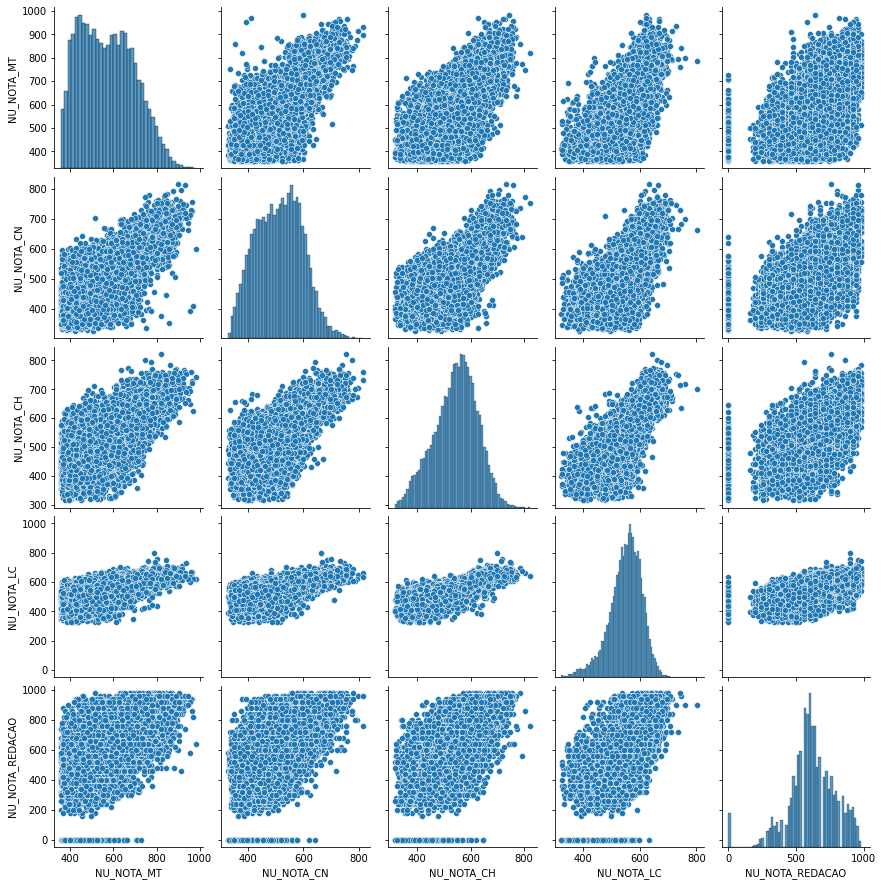

In [ ]:
provas = ['NU_NOTA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']
plt.figure(figsize=(10, 10))
sns.pairplot(dados_sem_notas_zero[provas], )
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

O comportamento dos gráficos de dispersão revelam como em maioria, estudantes que vão bem em uma prova, geralmente conseguem ir bem ou pelo menos não irem muito mal nas outras e o inverso também é verdade.
Hoje, na geração "Y" a divisão entre humanas, exatas e biologicas foi se dissolvendo aos poucos, a necessidade de ser "multi tarefas" faz com que alunos desenvolvam conhecimento em diferentes áreas, então vamos ver quais correlações podemos tirar disso.

In [ ]:
correlacao = dados[provas].corr()

Text(0.5, 1.0, 'Correlação entre provas')

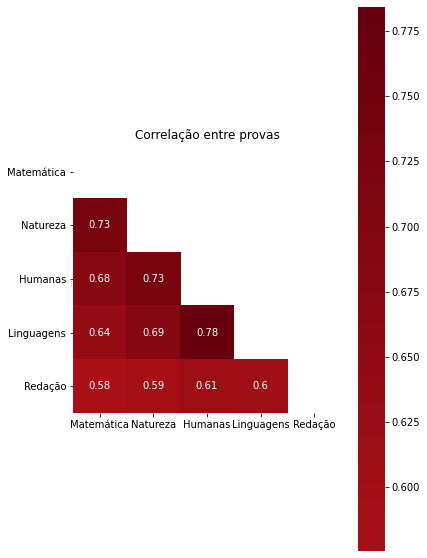

In [ ]:
# Visualizando a correlação entre as provas
plt.figure(figsize=(6, 10))
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlacao, cmap="Reds", center=0, annot=True, square=True, 
            yticklabels=['Matemática', 'Natureza', 'Humanas', 'Linguagens', 'Redação'],
            xticklabels=['Matemática', 'Natureza', 'Humanas', 'Linguagens', 'Redação'],
            mask=mask)
plt.title('Correlação entre provas')

Essa escadinha é uma representação mais numérica de todos aqueles gráficos acima. Em termos curtos, quanto maior o valor dentro do quadrado, maior a correlação entre as provas que alinham ao mesmo.
Vemos aqui que a maior correlação é entre Humanas e Linguagens, replicando a informação dos dados do Brasil.
Ciências da Natureza e Matemática não perdem por muito, a relação que a prova de Naturezas tem é por ser composta por Química e Física, matérias direcionadas a exatas, mas provavelmente a presença de Biologia pode ser uma boa causa da falta de uma maior correlação.

**Particulares e Públicas**

---

Lembra da proporção na quantidade de alunos das escolas particulares e públicas? Vamos ver na prática como a diferença entre essas escolas impactam os alunos.

In [ ]:
# Analisando o ranking de notas por escolas
df_medias = pd.DataFrame(medias_escolas())
# Pegando as médias por prova dos tipos de escolas 
df_medias.columns = ['Escola', 'Matematica', 'Natureza', 'Humanas', 'Linguagens', 'Redacao', 'Final', 'Tipo']
media_particulares = df_medias.query('Tipo == "Privada"')['Matematica'].mean()
N_PA_MT = df_medias.query('Tipo == "Privada"')['Matematica'].mean()
N_PA_CN = df_medias.query('Tipo == "Privada"')['Natureza'].mean()
N_PA_CH = df_medias.query('Tipo == "Privada"')['Humanas'].mean()
N_PA_LC = df_medias.query('Tipo == "Privada"')['Linguagens'].mean()
N_PA_RE = df_medias.query('Tipo == "Privada"')['Redacao'].mean()
N_PA_FI = df_medias.query('Tipo == "Privada"')['Final'].mean()

media_publicas = df_medias.query('Tipo == "Pública"')['Matematica'].mean()
N_PU_MT = df_medias.query('Tipo == "Pública"')['Matematica'].mean()
N_PU_CN = df_medias.query('Tipo == "Pública"')['Natureza'].mean()
N_PU_CH = df_medias.query('Tipo == "Pública"')['Humanas'].mean()
N_PU_LC = df_medias.query('Tipo == "Pública"')['Linguagens'].mean()
N_PU_RE = df_medias.query('Tipo == "Pública"')['Redacao'].mean()
N_PU_FI = df_medias.query('Tipo == "Pública"')['Final'].mean()
df_medias = df_medias.sort_values(by='Final', ascending=False)
df_medias.head(10)

,Escola,Matematica,Natureza,Humanas,Linguagens,Redacao,Final,Tipo
113,PROGRESSO CAMPINEIRO COLEGIO,764.66,622.26,662.29,619.10,860.00,705.66,Privada
63,COLEGIO ELITECOL,785.00,642.49,659.32,617.08,796.00,699.98,Privada
77,COMUNITARIA DE CAMPINAS ESCOLA,763.23,605.16,648.50,609.88,830.59,691.47,Privada
88,IMACULADA INSTITUTO EDUCACIONAL,734.57,609.36,633.73,603.04,813.09,678.76,Privada
31,COLEGIO POLIEDRO,720.41,598.74,618.38,601.12,834.67,674.66,Privada
79,RIO BRANCO COLEGIO,734.09,614.08,620.45,599.53,773.33,668.30,Privada
20,CAMPINAS COLEGIO TECNICO DE - UNICAMP,766.37,602.29,618.17,598.60,747.76,666.64,Pública
90,NOTRE DAME DE CAMPINAS COLEGIO,733.05,594.58,636.81,609.88,748.16,664.50,Privada
37,PROGRESSO BARAO GERALDO COLEGIO UNIDADE II,677.62,597.07,634.64,600.91,800.00,662.05,Privada
149,AMERICANA DE CAMPINAS ESCOLA EFM,727.62,586.34,597.74,594.82,780.00,657.30,Privada


Aqui estão as 10 escolas de Campinas, ordenadas pelas maiores notas finais (média das 5 provas) e observamos que das 10 "Melhores escolas", temos apenas uma escola pública.

Deve-se tomar cuidado, embora seja pública, é um colégio técnico pertecente a Unicamp, a disparidade do funcionamento dele com as escolas públicas reais é muito alta.

In [ ]:
df_medias.query('Tipo == "Privada"').head(10)

,Escola,Matematica,Natureza,Humanas,Linguagens,Redacao,Final,Tipo
113,PROGRESSO CAMPINEIRO COLEGIO,764.66,622.26,662.29,619.10,860.00,705.66,Privada
63,COLEGIO ELITECOL,785.00,642.49,659.32,617.08,796.00,699.98,Privada
77,COMUNITARIA DE CAMPINAS ESCOLA,763.23,605.16,648.50,609.88,830.59,691.47,Privada
88,IMACULADA INSTITUTO EDUCACIONAL,734.57,609.36,633.73,603.04,813.09,678.76,Privada
31,COLEGIO POLIEDRO,720.41,598.74,618.38,601.12,834.67,674.66,Privada
79,RIO BRANCO COLEGIO,734.09,614.08,620.45,599.53,773.33,668.30,Privada
90,NOTRE DAME DE CAMPINAS COLEGIO,733.05,594.58,636.81,609.88,748.16,664.50,Privada
37,PROGRESSO BARAO GERALDO COLEGIO UNIDADE II,677.62,597.07,634.64,600.91,800.00,662.05,Privada
149,AMERICANA DE CAMPINAS ESCOLA EFM,727.62,586.34,597.74,594.82,780.00,657.30,Privada
93,NOVO ANGLO COLEGIO UNIDADE TAQUARAL,693.41,584.68,606.53,590.85,800.00,655.09,Privada


In [ ]:
df_medias.query('Tipo == "Pública"').head(10)

,Escola,Matematica,Natureza,Humanas,Linguagens,Redacao,Final,Tipo
20,CAMPINAS COLEGIO TECNICO DE - UNICAMP,766.37,602.29,618.17,598.60,747.76,666.64,Pública
5,ANTONIO PRADO CONSELHEIRO ETEC,645.11,571.51,596.48,594.13,707.63,622.97,Pública
51,BENTO QUIRINO ETEC,644.15,555.25,587.84,582.08,685.67,611.00,Pública
3,CEEJA PAULO DECOURT,552.46,507.54,550.27,559.66,583.70,550.73,Pública
120,SEBASTIAO RAMOS NOGUEIRA PROFESSOR,536.27,507.36,538.91,547.27,615.56,549.07,Pública
133,UEF PREFEITO ANTONIO DA COSTA SANTOS,444.10,489.90,576.10,572.00,660.00,548.42,Pública
56,VITOR MEIRELLES,526.12,480.05,523.62,540.85,668.83,547.89,Pública
68,ANIBAL DE FREITAS PROFESSOR,552.81,506.14,531.76,547.91,587.24,545.17,Pública
74,JOAO NERY DOM,499.88,496.28,551.43,550.82,619.20,543.52,Pública
44,DJALMA OCTAVIANO PROFESSOR,541.25,499.84,530.44,540.98,600.36,542.57,Pública


Na primeira tabela, mostrei as 10 melhores escolas particulares, e no segundo, as 10 melhores públicas.
As 3 primeiras escolas públicas de Campinas são colégios técnicos, considerados um nível acima das escolas públicas, então desconsidarei eles para a próxima afirmação.

Vale ressaltar que as Escolas públicas são Escolas de centro de cidade, provando que as periféricas se encontram ainda pior.
Olhando as médias finais de ambos "Top 10", temos que a primeira escola pública real (CEEJA PAULO DECOURT) tem a nota final de 550.73, enquanto a 10ª escola particular mantém a nota de 655.09.
Vamos ver melhor isso.

In [ ]:
provas = ['Matematica', 'Natureza', 'Humanas', 'Linguagens', 'Redacao', 'Final']
fig = go.Figure(data=[
    go.Bar(name='Particular', x=provas, y=[N_PA_MT, N_PA_CN, N_PA_CH, N_PA_LC, N_PA_RE, N_PA_FI]),
    go.Bar(name='Publica', x=provas, y=[N_PU_MT, N_PU_CN, N_PU_CH, N_PU_LC, N_PU_RE, N_PU_FI]),
])

fig.update_layout(barmode='group', title_text='Comparação entre média de notas entre tipos de escolas.')
fig.show()

A média das provas entre alunos de escola particular e pública reproduz o que as médias das escolas mostravam.
Os alunos de escola particular tem uma vantagem mais do que grande em relação aos de escola pública.
Vamos deixar isso mais visual ainda.

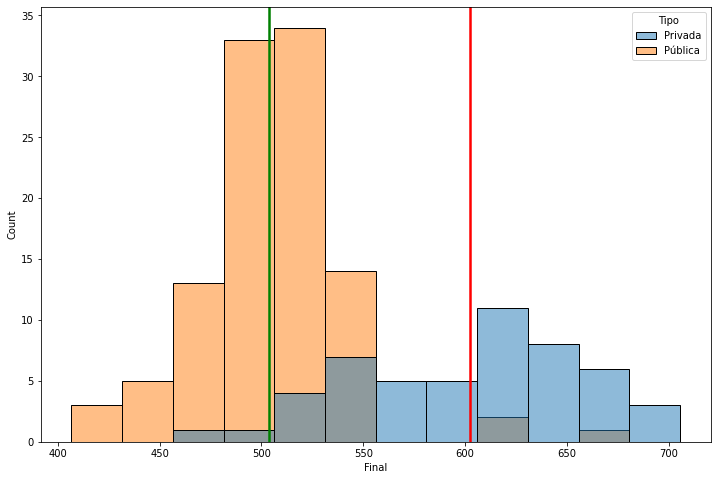

In [ ]:
plt.figure(figsize=(12, 8))
media_particular = df_medias.query('Tipo == "Privada"')['Final'].mean()
media_publica = df_medias.query('Tipo == "Pública"')['Final'].mean()
sns.histplot(df_medias, x="Final", hue="Tipo")
plt.axvline(x=media_particular, color='red', linewidth=2.5, label='Média Particular')
plt.axvline(x=media_publica, color='green', linewidth=2.5, label='Média Pública')
# Explicar linhas

Reparem a distância entre as linhas verde (média dos alunos de escola pública) e da linha vermelha (média dos alunos de escola particular).
Analisando isso, podemos afirmar que, em média os alunos de escola públicas não possuem chance contra as escolas particulares, logo a tentativa por vagas em cursos considerados "elite" como Engenharia de Computação, Medicina, Direito e outros permanece fora do alcance da grande maioria, sendo mantido para pessoas de classes sociais elevadas.
Uma forma de equilibrar um pouco a balança é seguir o exemplo da [USP](https://jornal.usp.br/especial/usp-realiza-mudanca-historica-na-selecao-de-alunos/) e da [Unicamp](https://guiadoestudante.abril.com.br/universidades/comvest-abre-inscricoes-para-ingresso-na-unicamp-via-enem/), que reservam vagas do Enem apenas para escolas públicas, garantindo assim a inserção de alunos de mais baixa classe social em cursos predominantemente liderados por pessoas de "elite". 

# Analise de Socioeconômica 

Aqui vamos partir para analise socioecômica dos participantes, usando principalmente diagramas de caixa e histogramas para representar a relação de notas com condições de vida

Lembra lá em cima quando vimos a idade dos participantes? Pois é, abaixo vamos ver o grau de escolaridade dos pais dos participantes, e em seguida uma relação interessante sobre porque a criação de programas que facilitem a entrada de pessoas mais velhas é uma boa opção para melhoria da educação.

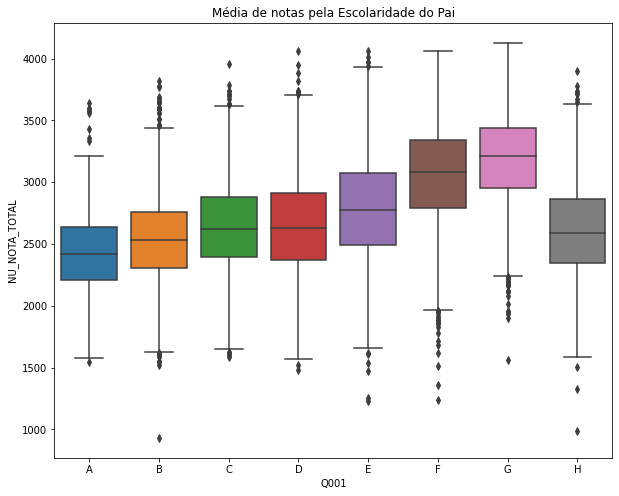

In [ ]:
boxplotar(dados, 'Q001', 'NU_NOTA_TOTAL', 'Média de notas pela Escolaridade do Pai')

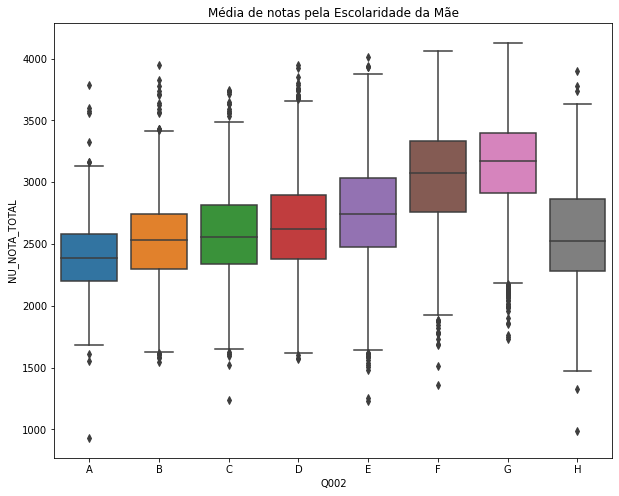

In [ ]:
boxplotar(dados, 'Q002', 'NU_NOTA_TOTAL', 'Média de notas pela Escolaridade da Mãe')

No dicionário vimos que A representa "Nunca estudou", G representa pós graduação completa e H representa que o candidato não sabe o grau de escolaridade dos pais.

Analisando esse gráfico, notamos facilmente que quanto maior o grau de estudo dos pais, maiores são as notas dos participantes.
O primeiro motivo é que quanto maior o titulo, provavelmente maior a renda salarial e consequentemente melhores condições de vida e estudo.
O Segundo é que ter um familiar próximo que estudou é um grande motivador para os mais novos encontrarem inspiração e exemplos.
Assim, com projetos de inserção de pessoas mais velhas em cursos de graduação, além de oferecer alternativas para essas pessoas melhorarem suas condições de vida, também aumentam as chances que os filhos dessas consigam ir melhor nas provas, assim chegando mais longe e gerando diferença na sua e na próxima geração da família. 

Como falamos sobre a relação de renda e notas, que tal conferir?

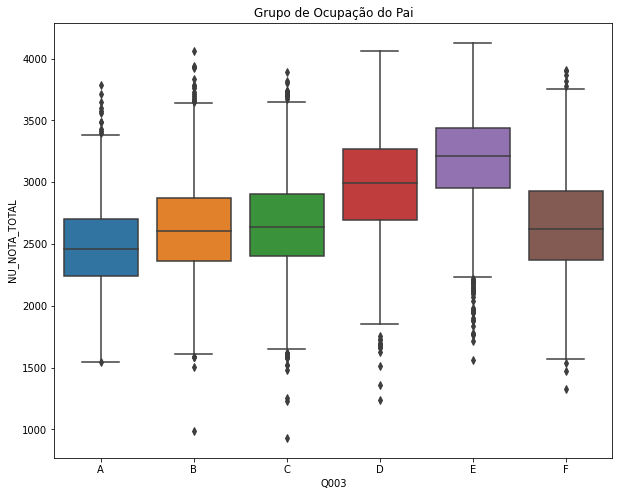

In [ ]:
boxplotar(dados, 'Q003', 'NU_NOTA_TOTAL', 'Grupo de Ocupação do Pai')

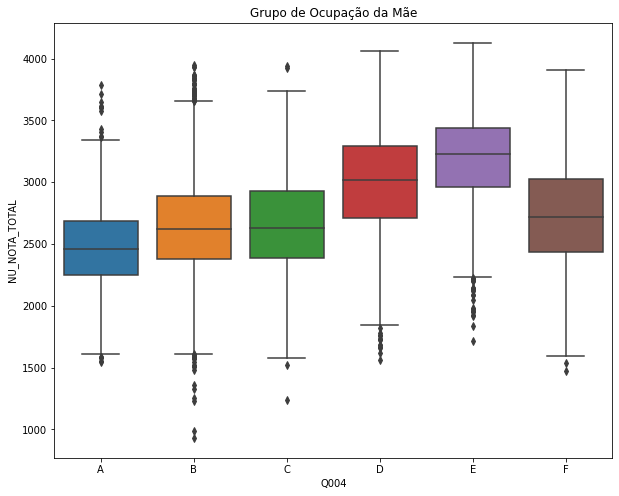

In [ ]:
boxplotar(dados, 'Q004', 'NU_NOTA_TOTAL', 'Grupo de Ocupação da Mãe')

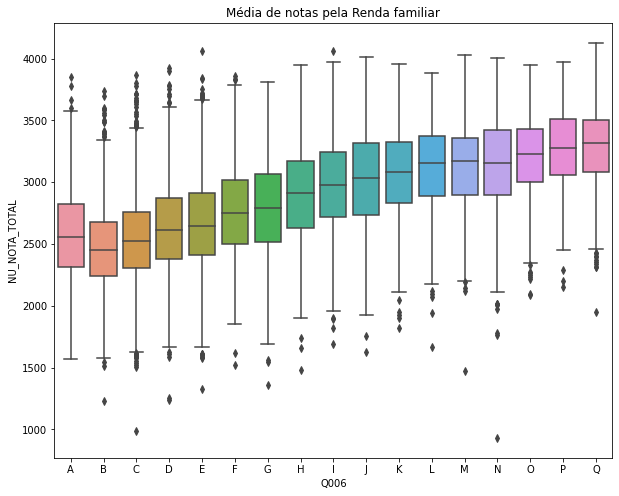

In [ ]:
boxplotar(dados, 'Q006', 'NU_NOTA_TOTAL', 'Média de notas pela Renda familiar')

A escada desenhada é impactante mas nada surpreendente, a renda familiar é diretamente ligada a condições de estudo, de ensino, alimentícia, entre outras que influenciam o desempenho dos estudantes, portanto aqui temos algo muito fácil de se entender a relação.

Quando falamos em condições de estudos, acredito que a internet seja o maior fator que contribui com a possibilidade de estudar ou não hoje em dia, então vamos verificar se ela realmnete é importante assim.

Text(0.5, 1.0, 'Histograma de Notas x Acesso internet')

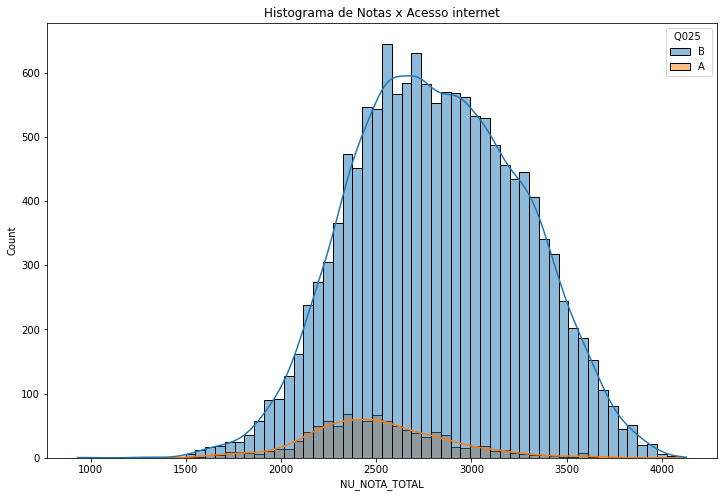

In [ ]:
# Acesso a Internet
plt.figure(figsize=(12, 8))
sns.histplot(dados, x="NU_NOTA_TOTAL", hue="Q025 ", kde=True)
plt.title('Histograma de Notas x Acesso internet')

Primeiro, é interessante ver a quantidade de pessoas que não possuem internet em Campinas em relação com as que possuem, e em seguida notar que as que não possuem internet praticamente não possuem chances de competir numa prova com os que possuem, mostrando novamente como as condições de vidam são cruciais para termos estudantes capacitados.
Vamos ver isso de outro ponto de vista.

Text(0.5, 1.0, 'Histograma de Notas x Celulares')

<Figure size 720x720 with 0 Axes>

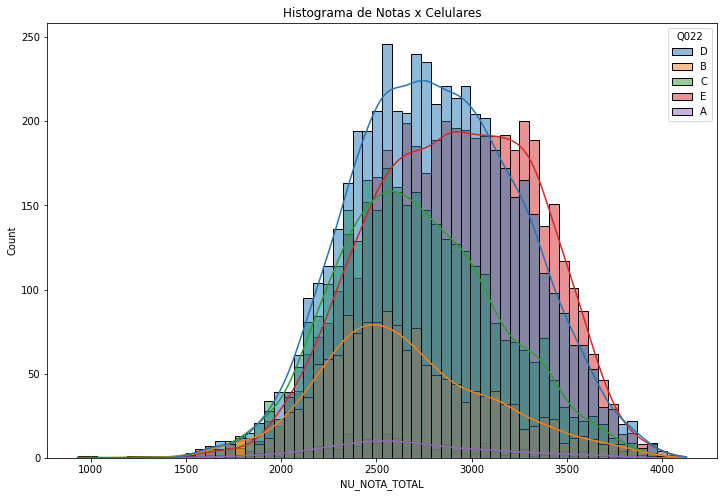

In [ ]:
# Relação nota e celulares 
plt.figure(figsize=(10, 10))
plt.figure(figsize=(12, 8))
sns.histplot(dados, x="NU_NOTA_TOTAL", hue="Q022", kde=True)
plt.title('Histograma de Notas x Celulares')

(-50.0, 1050.0)

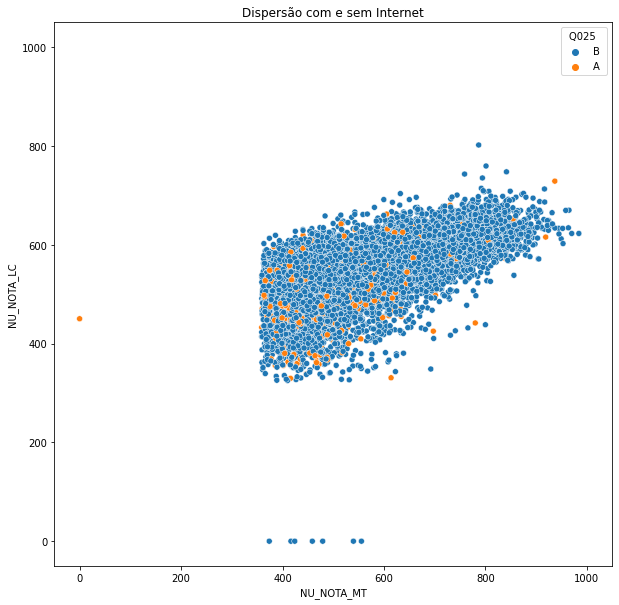

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025 ")
plt.title('Dispersão com e sem Internet')
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Aqui peguei as notas de Matematica e Linguagens, que representam cada dia de prova, e a ideia se mantém. 
Pessoas sem acesso a internet mal aparecem entre as melhores notas quando entram em contraste com os outros.
Pegando um curso de "alta competição" como medicina, cuja a nota nas provas precisam ser superior a 800, se olharmos no gráfico veremos que a quantidade de pessoas que conseguiriam é mínima possível, e quando acontecem se tornam "histórias de jornal" que embora pareça inspiradora, só mostra que a realidade é totalmente contra a meritocracia e sim a condições pré-estabelecidas por gerações passadas.

# Analise de Grupos de Minoria 

Aqui é o ponto que eu queria chegar desse projeto.

Tudo até agora, das analises gerais, notas e socioeconômicas foram feitas para chegar aqui, então vamos lá.

In [ ]:
homens = dados.query('TP_SEXO == "M"')
mulheres = dados.query('TP_SEXO == "F"')

# Médias em Matemática.
NU_H_MT = homens['NU_NOTA_MT'].mean()
NU_M_MT = mulheres['NU_NOTA_MT'].mean()

# Médias em Ciências da Natureza.
NU_H_CN = homens['NU_NOTA_CN'].mean()
NU_M_CN = mulheres['NU_NOTA_CN'].mean()

# Médias em Ciências Humanas.
NU_H_CH = homens['NU_NOTA_CH'].mean()
NU_M_CH = mulheres['NU_NOTA_CH'].mean()

# Médias em Linguagem.
NU_H_LC = homens['NU_NOTA_LC'].mean()
NU_M_LC = mulheres['NU_NOTA_LC'].mean()

# Médias em Redação.
NU_H_RE = homens['NU_NOTA_REDACAO'].mean()
NU_M_RE = mulheres['NU_NOTA_REDACAO'].mean()

provas=['Matemática', 'Natureza', 'Humanas', 'Linguagens', 'Redação']

fig = go.Figure(data=[
    go.Bar(name='Homens', x=provas, y=[NU_H_MT, NU_H_CN, NU_H_CH, NU_H_LC, NU_H_RE]),
    go.Bar(name='Mulheres', x=provas, y=[NU_M_MT, NU_M_CN, NU_M_CH, NU_M_LC, NU_M_RE])
])
fig.update_layout(barmode='group', title_text='Comparação entre média de notas por sexo.')
fig.show()

Comecei já mostrando a relação de notas e Sexos, visualizando claramente que os homens tem uma melhor média de notas que mulheres em tudo exceto em redação
A maior diferença é em matemática, será que homens são mais inteligente que mulheres em exatas?
Vamos ver mais

In [ ]:
mulheres_pretas = dados.query('TP_SEXO == "F" and TP_COR_RACA == 2')
homens_pretos = dados.query('TP_SEXO == "M" and TP_COR_RACA == 2')
mulheres_brancas = dados.query('TP_SEXO == "F" and TP_COR_RACA == 1')
homens_brancos = dados.query('TP_SEXO == "M" and TP_COR_RACA == 1')

# Notas g1
N_MP_MT = mulheres_pretas['NU_NOTA_MT'].mean()
N_MP_CN = mulheres_pretas['NU_NOTA_CN'].mean()
N_MP_CH = mulheres_pretas['NU_NOTA_CH'].mean()
N_MP_LC = mulheres_pretas['NU_NOTA_LC'].mean()
N_MP_RE = mulheres_pretas['NU_NOTA_REDACAO'].mean()

# Notas g2 

N_HP_MT = homens_pretos['NU_NOTA_MT'].mean()
N_HP_CN = homens_pretos['NU_NOTA_CN'].mean()
N_HP_CH = homens_pretos['NU_NOTA_CH'].mean()
N_HP_LC = homens_pretos['NU_NOTA_LC'].mean()
N_HP_RE = homens_pretos['NU_NOTA_REDACAO'].mean()

# Notas g3 

N_MB_MT = mulheres_brancas['NU_NOTA_MT'].mean()
N_MB_CN = mulheres_brancas['NU_NOTA_CN'].mean()
N_MB_CH = mulheres_brancas['NU_NOTA_CH'].mean()
N_MB_LC = mulheres_brancas['NU_NOTA_LC'].mean()
N_MB_RE = mulheres_brancas['NU_NOTA_REDACAO'].mean()

# Notas g4
N_HB_MT = homens_brancos['NU_NOTA_MT'].mean()
N_HB_CN = homens_brancos['NU_NOTA_CN'].mean()
N_HB_CH = homens_brancos['NU_NOTA_CH'].mean()
N_HB_LC = homens_brancos['NU_NOTA_LC'].mean()
N_HB_RE = homens_brancos['NU_NOTA_REDACAO'].mean()

fig = go.Figure(data=[
    go.Bar(name='Mulher Preta', x=provas, y=[N_MP_MT, N_MP_CN, N_MP_CH, N_MP_LC, N_MP_RE]),
    go.Bar(name='Homem Preto', x=provas, y=[N_HP_MT, N_HP_CN, N_HP_CH, N_HP_LC, N_HP_RE]),
    go.Bar(name='Mulher Branca', x=provas, y=[N_MB_MT, N_MB_CN, N_MB_CH, N_MB_LC, N_MB_RE]),
    go.Bar(name='Homem Branco', x=provas, y=[N_HB_MT, N_HB_CN, N_HB_CH, N_HB_LC, N_HB_RE]),
])
fig.update_layout(barmode='group', title_text='Comparação entre média de Extremos.')
fig.show()

Na "hierarquia social" temos dois grandes polos, o "Homem Branco" e a "Mulher Preta", então pra comparação, exclui as outras etnias por agora.
Agora olhe como quando colocamos em análise, a mulher branca já ultrapassou o homem negro em todas as provas, incluindo matemática.
A mulher negra é a que mantém a pior nota, vamos entender mais pra frente.
Curioso o fato de que as mulheres, tanto pretas quanto brancas, se destacam nas redações, mostrando que Campinas contemplou bem o resultado do Enem como um todo, já que [mulheres são a maioria entre as notas 1000 em redação](https://www.em.com.br/app/noticia/gerais/2020/01/18/interna_gerais,1115173/mulheres-sao-maioria-entre-as-melhores-redacoes-no-enem.shtml).

E sobre a "inferioridade" feminina em exatas, são diversos fatores que se resumem em falta de oportunidade, incentivo e opções, vou deixar um artigo de Maria Celeste (URD) e Maria da Conceição (UFMG) sobre o tema:
[Mulheres, homens e matemática](https://www.scielo.br/pdf/ep/v34n3/v34n3a07.pdf)

Para não deixar em falta, vamos conferir a média de notas por etnia também.

In [ ]:
branca = dados.query('TP_COR_RACA == 1')
preta = dados.query('TP_COR_RACA == 2')
parda = dados.query('TP_COR_RACA == 3')
amarela = dados.query('TP_COR_RACA == 4')
indigena = dados.query('TP_COR_RACA == 5')

# Notas Brancos
N_EB_MT = branca['NU_NOTA_MT'].mean()
N_EB_CN = branca['NU_NOTA_CN'].mean()
N_EB_CH = branca['NU_NOTA_CH'].mean()
N_EB_LC = branca['NU_NOTA_LC'].mean()
N_EB_RE = branca['NU_NOTA_REDACAO'].mean()

# Notas Pretos
N_EN_MT = preta['NU_NOTA_MT'].mean()
N_EN_CN = preta['NU_NOTA_CN'].mean()
N_EN_CH = preta['NU_NOTA_CH'].mean()
N_EN_LC = preta['NU_NOTA_LC'].mean()
N_EN_RE = preta['NU_NOTA_REDACAO'].mean()

# Notas Pardos
N_EP_MT = parda['NU_NOTA_MT'].mean()
N_EP_CN = parda['NU_NOTA_CN'].mean()
N_EP_CH = parda['NU_NOTA_CH'].mean()
N_EP_LC = parda['NU_NOTA_LC'].mean()
N_EP_RE = parda['NU_NOTA_REDACAO'].mean()

# Notas Amarelos
N_EA_MT = amarela['NU_NOTA_MT'].mean()
N_EA_CN = amarela['NU_NOTA_CN'].mean()
N_EA_CH = amarela['NU_NOTA_CH'].mean()
N_EA_LC = amarela['NU_NOTA_LC'].mean()
N_EA_RE = amarela['NU_NOTA_REDACAO'].mean()

# Notas Indígenas
N_EI_MT = indigena['NU_NOTA_MT'].mean()
N_EI_CN = indigena['NU_NOTA_CN'].mean()
N_EI_CH = indigena['NU_NOTA_CH'].mean()
N_EI_LC = indigena['NU_NOTA_LC'].mean()
N_EI_RE = indigena['NU_NOTA_REDACAO'].mean()

fig = go.Figure(data=[
    go.Bar(name='Brancos', x=provas, y=[N_EB_MT, N_EB_CN, N_EB_CH, N_EB_LC, N_EB_RE]),
    go.Bar(name='Pretos', x=provas, y=[N_EN_MT, N_EN_CN, N_EN_CH, N_EN_LC, N_EN_RE]),
    go.Bar(name='Pardos', x=provas, y=[N_EP_MT, N_EP_CN, N_EP_CH, N_EP_LC, N_EP_RE]),
    go.Bar(name='Amarelos', x=provas, y=[N_EA_MT, N_EA_CN, N_EA_CH, N_EA_LC, N_EA_RE]),
    go.Bar(name='Indígenas', x=provas, y=[N_EI_MT, N_EI_CN, N_EI_CH, N_EI_LC, N_EI_RE]),
])

fig.update_layout(barmode='group', title_text='Comparação entre média de notas por Etnia.')
fig.show()


Ao contrário da amostra Nacional, em Campinas a etnia amarela tem uma alavancada em relação aos brancos, que por sua vez não fica muito pra trás e ainda consegue ficar bem a frente do restante, guarde esse gráfico, nas nossas conclusões finais vamos precisar lembrar dele.

In [ ]:
P_ESCOLA_PARTICULAR = dados.query('TP_ESCOLA == 3')
fig = px.pie(values=P_ESCOLA_PARTICULAR['TP_COR_RACA'].value_counts(), names=['Branca', 'Parda', 'Preta', 'Amarelo', 'Não declarado', 'Indígina'],title='Proporção de Etnias nas escolas particulares')
fig.show()

Muitos debates sobre cotas são levantados, sobre a exclusão das cotas raciais e permanecendo apenas as cotas socioeconômicas, mas será que uma coisa não é ligada a outra?
As maiores notas do Enem como vimos, são de escolas particulares, e agora vemos que 83% dos alunos de escolas particulares são brancos?
Vamos conferir se isso é realmente problemático.

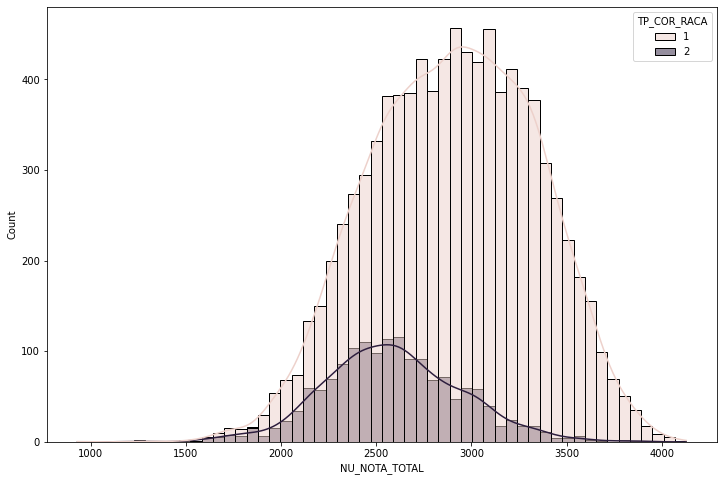

In [ ]:
plt.figure(figsize=(12, 8))
brancos_negros = dados.query('TP_COR_RACA == 1 or TP_COR_RACA == 2')
sns.histplot(brancos_negros, x="NU_NOTA_TOTAL", hue="TP_COR_RACA", kde=True)

(-50.0, 1050.0)

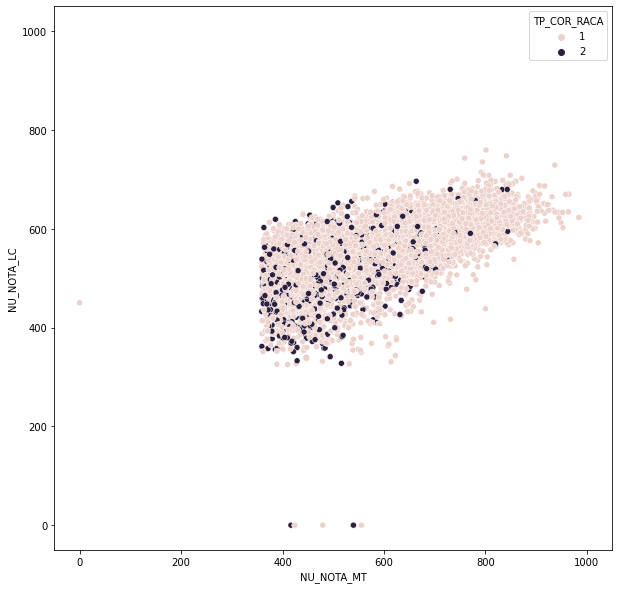

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = brancos_negros, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="TP_COR_RACA")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Usarei o exemplo agora de Engenharia de Computação, que em 2019 a nota média foi 750, olhando para os gráficos, quantos negros conseguiriam ter chance entrar em um curso desse "nível" quando em comparação aos alunos brancos?
Quer ver piorar? Vamos ver como MULHERES negras ficam no meio disso.

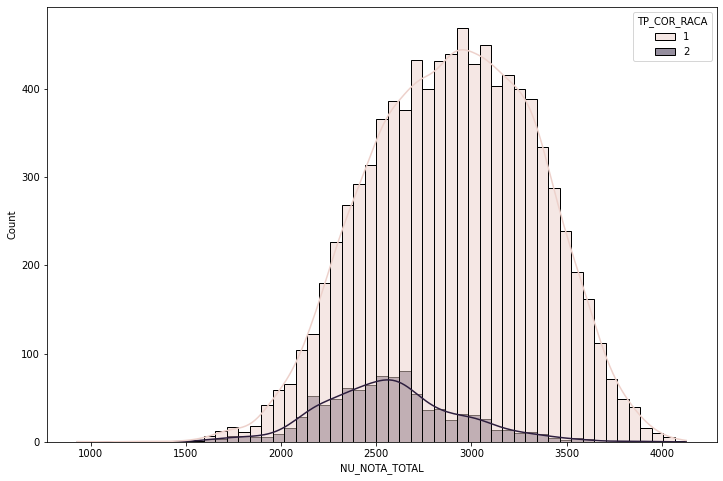

In [ ]:
plt.figure(figsize=(12, 8))
brancos_negras = dados.query('TP_COR_RACA == 1 or TP_COR_RACA == 2 and TP_SEXO == "F"')
sns.histplot(brancos_negras, x="NU_NOTA_TOTAL", hue="TP_COR_RACA", kde=True)

(-50.0, 1050.0)

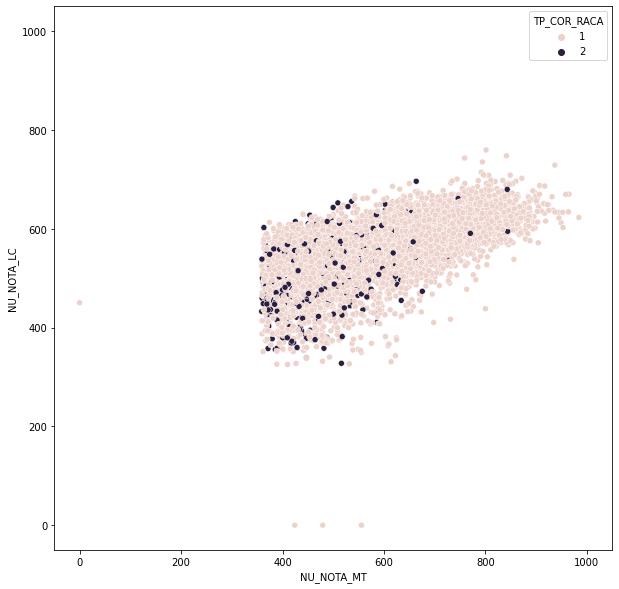

In [ ]:
plt.figure(figsize=(10, 10))
brancos_negras = dados.query('TP_COR_RACA == 1 or TP_COR_RACA == 2 and TP_SEXO == "F"')
sns.scatterplot(data = brancos_negras, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="TP_COR_RACA")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Para transmitir a diferença até dentre as mulheres brancas com Homens brancos, vamos ver.

(-50.0, 1050.0)

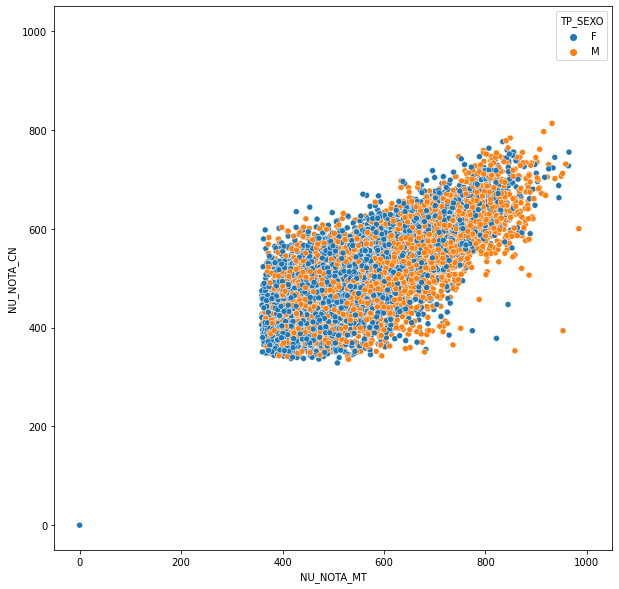

In [ ]:
plt.figure(figsize=(10, 10))
brancos = dados.query('TP_COR_RACA == 1')
sns.scatterplot(data = brancos, x="NU_NOTA_MT", y="NU_NOTA_CN", hue="TP_SEXO")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

Comparando esse gráfico com os outros dois, onde vemos os negros, é possível falar que o único problema é a renda e que cotas socioeconômicas são as únicas que deveriam ter?

# Conclusões

## Gerais

Nas analises gerais, notamos algumas coisas interessantes:


1.   Embora as mulheres sejam maioria no Enem, elas não conseguem as maiores notas em geral, mostrando como o a desigualdade de gênero afeta mais qualitativamente do que quantitativamente.

2.   A proporção etnico racial é extremamente desigual, sendo a esmagadora maioria sendo de pessoas brancas. Quando colocamos em contraste com quem comanda as escolas escolas particulares, pai mais bem formados e quem possui maiores rendas, é facil relacionar que pessoas brancas tem mais acesso a informação, exemplos a seguir e mais oportunidades e portanto irão ser maioria em aplicar a prova.

3. A proporção de escola pública para particular (se mantém mesmo com boa parte não respondida) mostra que existem muitos mais alunos de escola pública, e que novamente, a quantidade perde pra qualidade, já que a maioria das vagas vão ser conqistadas pelos alunos das escolas particulares, reforçando a implementação bem planejada de reserva de vagas para escolas públicas como Unicamp e USP.

4. Com a distribuição de idades, vendo a queda entre 17 anos e 18 anos, mostra que grande parte dos alunos prestam durante o ensino médio, e quando saem, boa parte desiste e raramente volta a prestar (vide as próximas idades) e como a idade vira um fator determinante para a não aplicação da prova, excluindo pessoas mais velhas de vagas na universidade.
A criação de projetos que facilitem vagas para pessoas mais velhas em cursos de graduação OU técnologos pode rebalancear essa situação, criando inclusive opções viáveis para os filhos dos que tiverem (visto que o grau de escolaridade dos pais impacta nos filhos).



## Notas



1.   É fácil ver a correlação entre notas, que conforme um aluno vai bem em uma prova, costuma ir bem nas restante, mostrando que os estudantes de Campinas que conseguem e tem chance de estudar, conseguem se destacar nas provas sem grande dificuldades em provas específicas.

2.   Replicando o cenário nacional e estadual, a correlação mais próxima é a de linguagens e humanidades, mas a conclusão que podiamos tirar dessas correlações é sobre como aumentar as baixas. Matemática e Linguagens são matérias que acompanham os alunos desde o fundamental, e seguem sendo "rivais" na opção de estudo dos alunos, um plano de desenvolvimento pedagógico visando unir ambas as disciplinas durante o ensino médio deveria ser implementado, fazendo os alunos não terem que escolher entre uma outra outra, mas aprende-las juntas.
Isso poderia suprir um pouco os pontos fracos dos homens em linguagens e redação e suprir os pontos fracos das mulheres em matemática, visto nos gráficos que mulheres se dão melhor em linguagens e redação enquanto homens se dão melhor em matemática, a união dessas disciplinas poderia ser um balanceador de ambos os grupos, trazendo vantagens para todos os alunos.

3. Os projetos de escolas particulares e públicas são diferentes, enquanto a particular visa o objetivo de fazer os alunos sairem com boas notas nas provas, a pública é obrigada por lei a garantir um ensino mais amplo, sobre cultura, valores e vida, além da educação acadêmica. Essa junção de funções, somadas com a falta de estrutura e mal planejamento, causa a queda nas notas dos alunos em relação as escolas particulares. Não existe forma de transformar escolas públicas em particulares, portanto, as estratégias apresentadas aqui visam diminuir a diferença de notas, buscando trazer uma maior igualdade entre os alunos de ambas as redes escolares e assim criando mais oportunidades.



## Socioeconômicos



1.   Com os diagramas de caixa, mostrando a relação de notas com o grau de escolaridade e o grupo de trabalho dos pais, fica claro que quanto maior a escolaridade dos pais, melhor o desempenho dos filhos.
Fica claro também que no grupo de trabalho, o grande salto ocorre do grupo C para o grupo D, interessante ver que o grupo C são trabalhos que geralmente necessitam de cursos técnicos ou de curta duração, enquanto o grupo D são profissões que exigem ou uma graduação ou um certo capital de investimento.
Reforçando o projeto de vagas para pessoas com mais idade, mostrando novamente como podem impactar os filhos a conseguirem melhores notas.

2.   Muito vísivel a desigualdade de chance de se obter uma vaga com o Enem quando se possui uma renda baixa e principalmente quando não se possui internet. A amostragem relata a necessidade urgente de implementação de cotas socioeconômicas e/ou projetos que levem acesso a informação e internet aos estudantes que necessitam, além de começar projetos de bolsa em iniciação científica (Colégios técnicos possuem) podendo oferecer auxílio monetário para alunos de baixa renda enquanto os mesmos mantém suas notas boas, criando assim melhores chances nas provas e vestibulares.



## Grupos Minoritários



1.   Conforme o artigo e os gráficos, notamos que existe sim uma diferença grande entre as mulheres e os homens nas provas de matemática e de redação. As mulheres possuem baixo incentivo, exemplos e oportunidades para aprender matemática, criando um trajetória que se consolida ao decorrer dos anos. Opções viavéis para criar melhores gerações de mulheres matemáticas poderiam ser oficínas, encontros e projetos que levem mulheres para as exatas, tais como oficinas de programação, palestras de mulheres engenheiras nas escolas, entre outros, tentando mostrar exemplos e despertar interesse para exatas nas meninas enquanto ainda crianças, visando ao decorrer dos anos, diminuir essa diferença entre as notas.

2.   O caso da mulher negra e da mulher branca são bem diferente, as mulheres negras sofrem 3 principais problemas, sendo: O machismo, o racismo e questões socioeconômicas, já que a população negra é a parte que não está no topo das pirâmides financeiras. Dito isso, a criação mais importante é projetos visando exatamente elas, projetos como citei acima para todas as mulheres, mas mais especifícos, alguns levados nas periferias e zonas menos privilegiadas da cidade. O projeto de bolsas de iniciação científica em escolas com acordos com universidades locais deve ser implementado com urgência, reservando vagas ESPECIFICAMENTE para esse grupo, já que iria suprir parte do problema econômico e do problema de exatas para elas.

3. A maior parte da população de Campinas é negra OU parda, no entanto são responsaveis por apenas 36.2% dos participantes do Enem. O fato é que por serem majoritariamente de escolas públicas e terem pouco incentivo, não se interessam pelo Enem ou pela faculdade, boa parte (como visto no gráfico de idades) não volta a prestar a prova após sair do Ensino Médio. Programas de vísita à universidde (Unicamp) para incentiva-los, amostra de cursos, levar alunos das universidade e levar a pesquisa até as escolas públicas "de bairro" poderiam ser um agravante forte para aumentar o interesse dos alunos.

4. A questão das notas da população negra só pode ser resolvida após a solução acima ser implementada, sem a geração de interesse da população, não existe chances de melhoria. As escolas públicas precisam de estrutura, mas principalmente precisam dos alunos, e para terem os alunos, precisam primeiro motiva-los.

